## Dataset Overview
This dataset provides daily weather information for Australia, dating back to 2008. Each observation represents a single day in a given location. The data provided relates to weather conditions throughout the day such as wind and wind direction, temperature, humidity, pressure, whether it rained today and whether or not it rained the following day.

The dataset contains **145,460 observations across 24 columns** and can be found at the link below:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

%matplotlib inline

## Read dataset in and begin investigating its properties

In [3]:
weather = pd.read_csv('weatherAUS.csv')

In [4]:
weather.shape

(145460, 24)

In [5]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
pd.options.display.max_rows = 999
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


## Exploratory Analysis

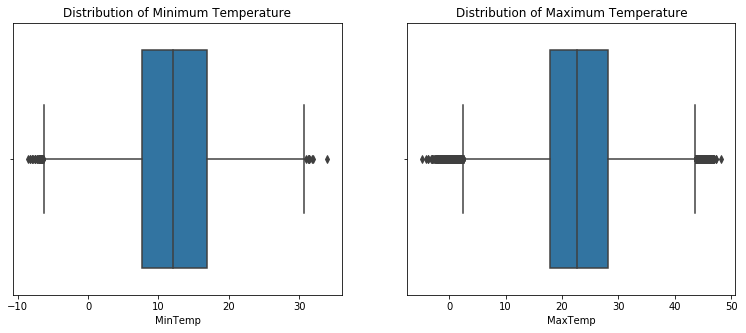

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64
count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64


In [8]:
#Start with MinTemp and MaxTemp

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(x=weather["MinTemp"])
plt.title('Distribution of Minimum Temperature')

plt.subplot(1,3,2)
sns.boxplot(x=weather["MaxTemp"])
plt.title('Distribution of Maximum Temperature')
plt.show()

print(weather['MinTemp'].describe())
print(weather['MaxTemp'].describe())

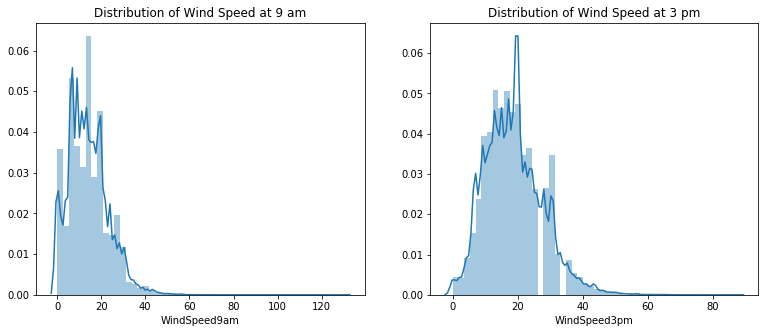

In [9]:
#Next look at Wind Speed

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['WindSpeed9am'].dropna())
plt.title('Distribution of Wind Speed at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['WindSpeed3pm'].dropna())
plt.title('Distribution of Wind Speed at 3 pm')
plt.show()

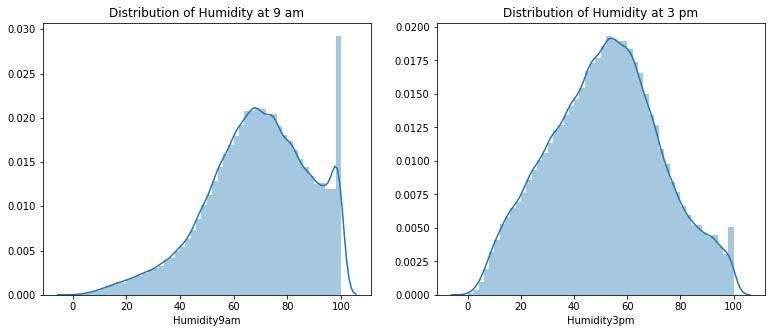

In [10]:
#Next look at Humidity

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['Humidity9am'].dropna())
plt.title('Distribution of Humidity at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['Humidity3pm'].dropna())
plt.title('Distribution of Humidity at 3 pm')
plt.show()

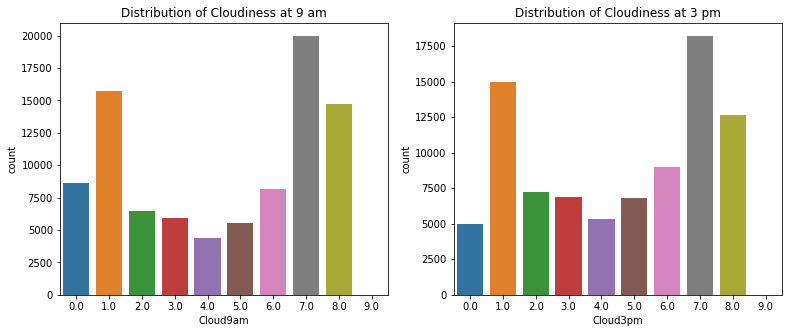

In [11]:
#Next, look at cloudiness

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.countplot(x=weather['Cloud9am'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 9 am')


plt.subplot(1,3,2)
sns.countplot(x=weather['Cloud3pm'].dropna(), data=weather)
plt.title('Distribution of Cloudiness at 3 pm')
plt.show()

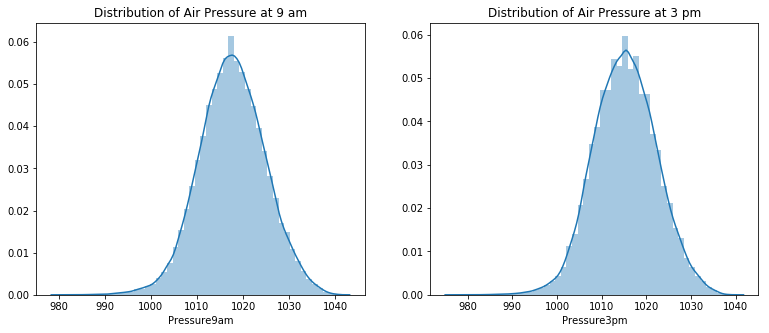

In [12]:
#Next, look at air pressure

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(weather['Pressure9am'].dropna())
plt.title('Distribution of Air Pressure at 9 am')

plt.subplot(1,3,2)
sns.distplot(weather['Pressure3pm'].dropna())
plt.title('Distribution of Air Pressure at 3 pm')
plt.show()

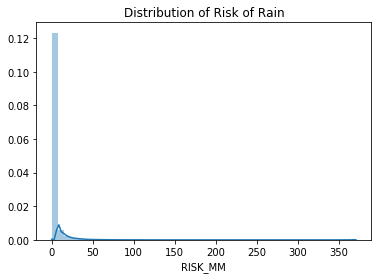

count    142193.000000
mean          2.360682
std           8.477969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64


In [13]:
#Finally, look at Risk of Rain
sns.distplot(weather['RISK_MM'].dropna())
plt.title('Distribution of Risk of Rain')
plt.show()
print(weather['RISK_MM'].describe())

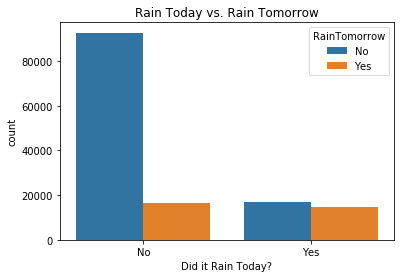

In [14]:
#Now look at Rain Today and whether or not it rained the next day (Rain Tomorrow)
sns.countplot(x='RainToday', hue='RainTomorrow', data=weather)
plt.title('Rain Today vs. Rain Tomorrow')
plt.xlabel('Did it Rain Today?')
plt.show()

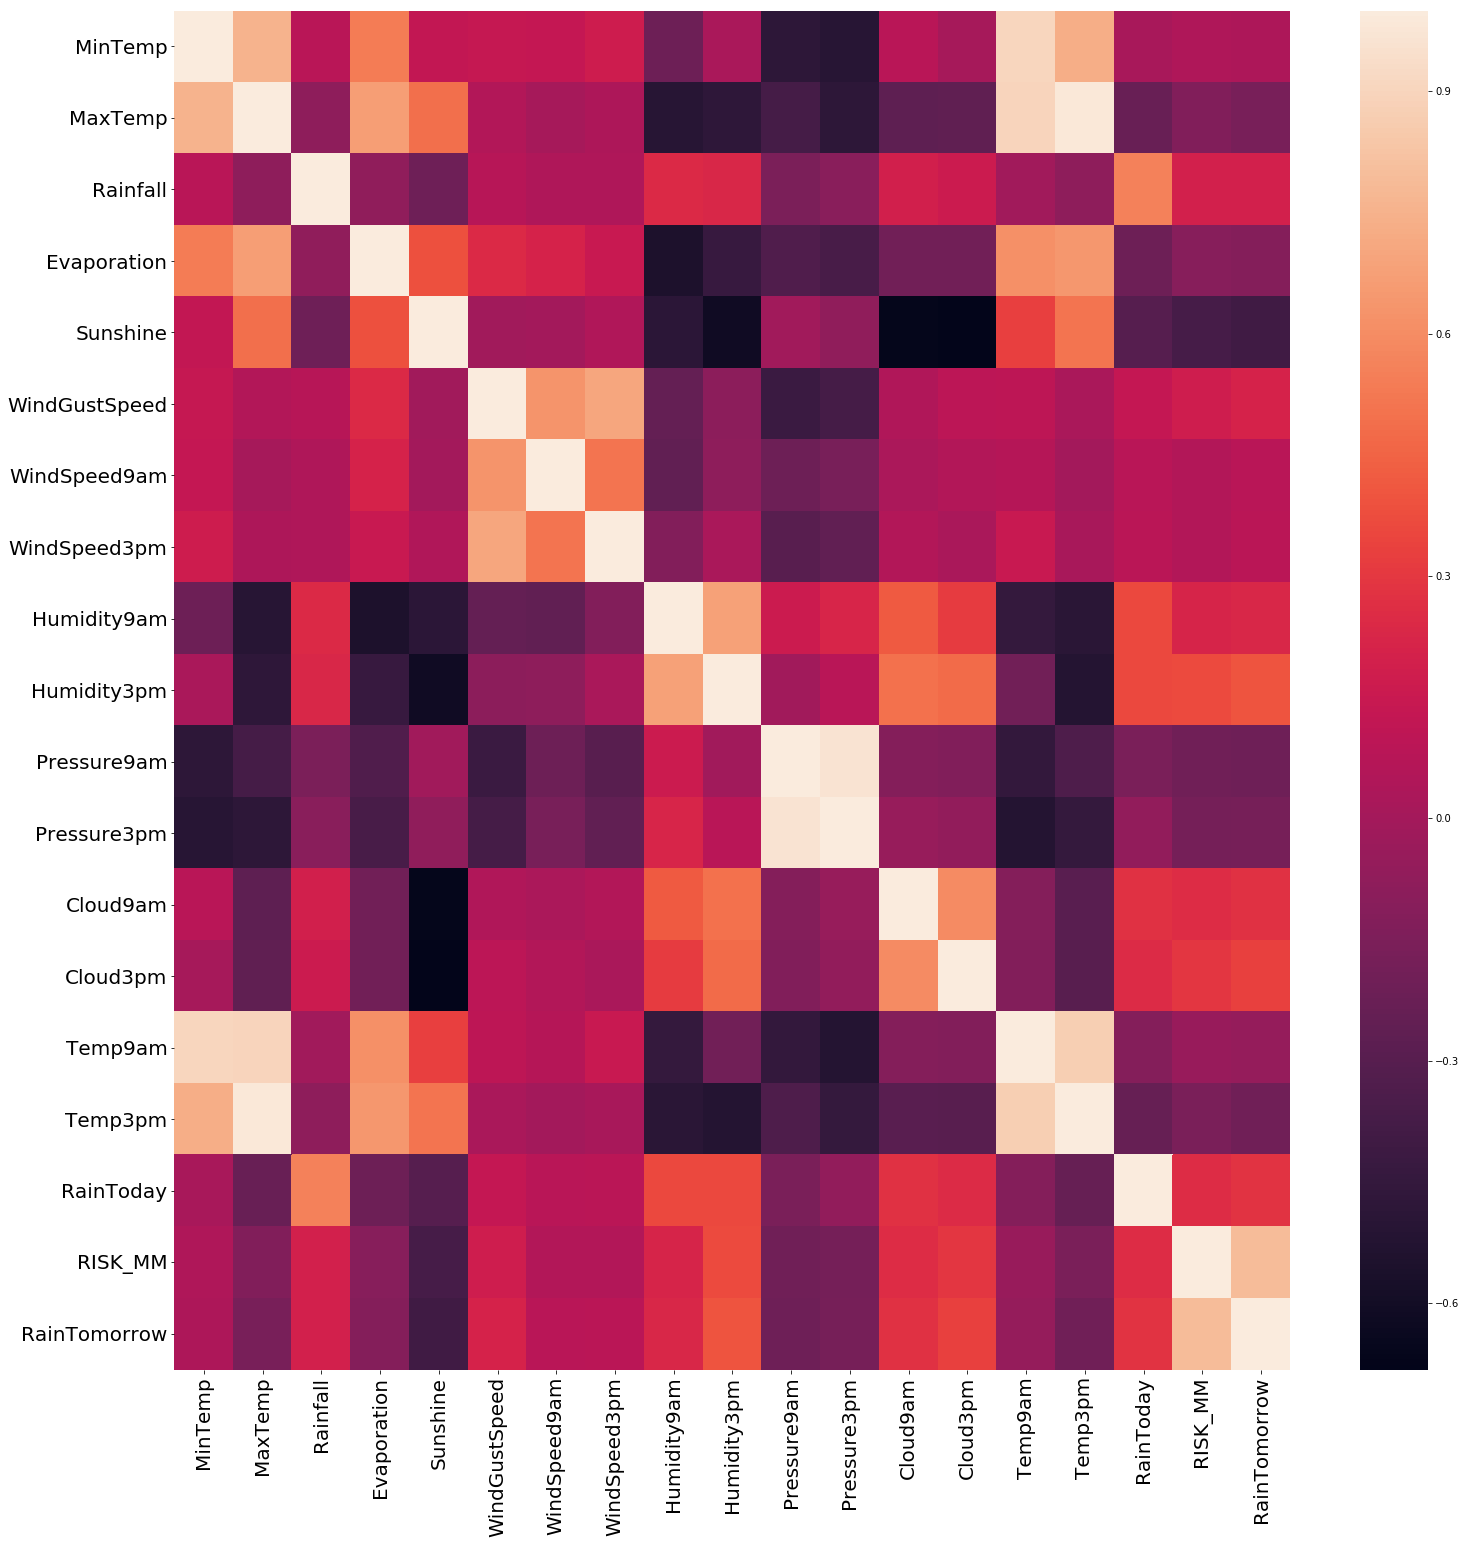

In [35]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(weather.corr())
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Data Cleaning

In [15]:
#Determine missing values across dataframe

missing_values_count = weather.isnull().sum()
print(missing_values_count)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64


In [16]:
#Drop all NaNs
weather = weather.dropna()

## Feature Selection / Engineering

In [17]:
#Change RainToday & RainTomorrow to binary
weather['RainToday'] = np.where((weather['RainToday'] == 'Yes'), 1, 0) #Rain = 1, No Rain = 0
weather['RainTomorrow'] = np.where((weather['RainTomorrow'] == 'Yes'), 1, 0) #Rain = 1, No Rain = 0

In [18]:
#Get rid of skewness/outliers in Risk of Rain
weather['RISK_MM'].quantile(0.95)

12.6

In [19]:
#Transform Risk of Rain based on quantile method above
weather = weather[weather['RISK_MM'] <= 13]

## Define Research Question

**Background:**It seems that the public is always blaming the "weatherman" when a prediction proves to be false. Inaccurate predictions can be quite impactful, from ruining plans or events to causing dangerous road conditions. Being able to predict, to a very high degree of certainty, whether or not certain weather conditions will occur would be an extremely useful model.

**Research Question:**Will it rain tomorrow?

**Methodology:**First determine baseline accuracy, then use a number of different classification models to fit our data and predict accuracy. Based on the results, refine and tune in order to achieve the highest accuracy, in both training and test data. 

## Create Repeatable Functions for Each Model Type

In [20]:
#Establish X and Y
#Use pd.get_dummies for X because WindGustDir, WindDir9am, WindDir3pm are categorical

X = weather.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather.RainTomorrow

## Naive Bayes

In [21]:
#Create Function

def NB_Model(model):
        if model == 'Bernoulli':
            NB_Model = BernoulliNB()
            NB_Model.fit(X, Y)
            positive_pred = NB_Model.predict(X)
            print('\n Percentage accuracy for Bernoulli Naive Bayes')
            print(str(NB_Model.score(X, Y)*100) + '%')
            print('\n Cross-Validation Score')
            print(cross_val_score(NB_Model, X, Y, cv=5))
            print('\n Confusion Matrix')
            display(confusion_matrix(Y, positive_pred))
        
        elif model == 'Gaussian':
            NB_Model = GaussianNB()
            NB_Model.fit(X, Y)
            positive_pred = NB_Model.predict(X)
            print('\n Percentage accuracy for Gaussian Naive Bayes')
            print(str(NB_Model.score(X, Y)*100) + '%')
            print('\n Cross-Validation Score')
            print(cross_val_score(NB_Model, X, Y, cv=5))
            print('\n Confusion Matrix')
            display(confusion_matrix(Y, positive_pred))

        else:
            NB_Model = MultinomialNB()
            NB_Model.fit(X, Y)
            positive_pred = NB_Model.predict(X)
            print('\n Percentage accuracy for Multinomial Naive Bayes')
            print(str(NB_Model.score(X, Y)*100) + '%')
            print('\n Cross-Validation Score')
            print(cross_val_score(NB_Model, X, Y, cv=5))
            print('\n Confusion Matrix')
            display(confusion_matrix(Y, positive_pred))

## K-Nearest Neighbors

In [29]:
#Create function

def KNN_Model(k, weight):
    KNN = KNeighborsClassifier(n_neighbors=k, weights=weight)
    KNN.fit(X, Y)
    positive_pred = KNN.predict(X)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(KNN, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))

## Random Forest

In [23]:
#Create function

def RFC_Model(trees, criteria, num_features, depth):
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    positive_pred = rfc.predict(X)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(rfc, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))

## Logistic Regression

In [42]:
#Create function

def Logistic_Reg_Model(regularization, alpha):
    if regularization == 'l1':
        lr_lasso = LogisticRegression(penalty=regularization, C=alpha)
        lr_lasso.fit(X, Y)
        positive_pred = lr_lasso.predict(X)
        print('\n Percentage accuracy for Lasso Logistic Regression')
        print(str(lr_lasso.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_lasso, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
    elif regularization == 'l2' and alpha == 1e9:
        lr_regular = LogisticRegression(penalty=regularization, C=alpha)
        lr_regular.fit(X, Y)
        positive_pred = lr_regular.predict(X)
        print('\n Percentage accuracy for Logistic Regression')
        print(str(lr_regular.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_regular, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
    else:
        lr_ridge = LogisticRegression(penalty=regularization, C=alpha)
        lr_ridge.fit(X, Y)
        positive_pred = lr_ridge.predict(X)
        print('\n Percentage accuracy for Ridge Logistic Regression')
        print(str(lr_ridge.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_ridge, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))

## Support Vector Classifer

In [25]:
#Create function

def SVC_Model(c, kernel_type):
    svm = SVC(C=c, kernel=kernel_type)
    svm.fit(X, Y)
    positive_pred = svm.predict(X)
    print('\n Percentage accuracy for SVM')
    print(str(svm.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(svm, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))

## Gradient Boosting

In [30]:
#Create function

def Gradient_Boost_Model(estimators, depth, loss_function, sampling):
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, loss=loss_function, subsample=sampling)
    clf.fit(X, Y)
    positive_pred = clf.predict(X)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    print(str(clf.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(clf, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))

## Run Initial Models, Default Parameters

In [27]:
#Use a sample so that our models will run without using too much computing power
weather = weather.sample(n = 10000)

#Reestablish X and Y
X = weather.drop(['RainTomorrow'], 1)
X = pd.get_dummies(X)
Y = weather.RainTomorrow

In [28]:
#Calculate baseline accuracy for RainTomorrow
RainTomorrow_total = weather['RainTomorrow'].sum()
print('Baseline accuracy for Rain Tomorrow is: ' + str(round((RainTomorrow_total/weather.shape[0])*100, 2)) + '%')

Baseline accuracy for Rain Tomorrow is: 18.0%


In [43]:
#Run all models with default criteria, with returns in between so we can easily read

#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
88.52%

 Cross-Validation Score
[0.855 0.855 0.865 0.869 0.849]

 Confusion Matrix


array([[7527,  673],
       [ 475, 1325]])





 Percentage accuracy for K Nearest Neighbors Classifier
90.75999999999999%

 Cross-Validation Score
[0.8615 0.877  0.8695 0.876  0.8765]

 Confusion Matrix


array([[8054,  146],
       [ 778, 1022]])





 Percentage accuracy for Random Forest Classifier
99.75%

 Cross-Validation Score
[0.97   0.929  0.967  0.96   0.9455]

 Confusion Matrix


array([[8199,    1],
       [  24, 1776]])





 Percentage accuracy for Logistic Regression
100.0%

 Cross-Validation Score
[0.9975 0.9995 0.998  0.9975 1.    ]

 Confusion Matrix


array([[8200,    0],
       [   0, 1800]])





 Percentage accuracy for Lasso Logistic Regression
100.0%

 Cross-Validation Score
[1. 1. 1. 1. 1.]

 Confusion Matrix


array([[8200,    0],
       [   0, 1800]])





 Percentage accuracy for Ridge Logistic Regression
100.0%

 Cross-Validation Score
[0.999  0.9995 0.9975 0.9975 1.    ]

 Confusion Matrix


array([[8200,    0],
       [   0, 1800]])





 Percentage accuracy for SVM
95.69%

 Cross-Validation Score
[0.9515 0.953  0.946  0.9495 0.952 ]

 Confusion Matrix


array([[8189,   11],
       [ 420, 1380]])





 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[1. 1. 1. 1. 1.]

 Confusion Matrix


array([[8200,    0],
       [   0, 1800]])

## Use Recursive Feature Selection to Determine Most Important Features from Our Most
## Successful Models

In [41]:
#Create function for RFE

def recursive_feat_selection(model):
    selector = RFE(model)
    selector = selector.fit(X, Y)
    rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
    display(rankings.sort_values('Ranking'))

In [ ]:
#Use RFE on our top three models - lasso logistic regression, ridge logistic regression,
#gradient boosting

lr_lasso = LogisticRegression(penalty='l1', C=1.0)
lr_lasso.fit(X, Y)
print('Recursive Feature Selection for Lasso Logistic Regression')
recursive_feat_selection(lr_lasso)
print('\n\n')

lr_ridge = LogisticRegression(penalty='l2', C=1.0)
lr_ridge.fit(X, Y)
print('Recursive Feature Selection for Ridge Logistic Regression')
recursive_feat_selection(lr_ridge)
print('\n\n')

clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=3, loss='deviance', subsample=1)
clf.fit(X, Y)
print('Recursive Feature Selection for Gradient Boosting')
print(clf.feature_importances_)

Recursive Feature Selection for Lasso Logistic Regression
